# Assignment8

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import seaborn as sns

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [5]:
from google.colab import drive
drive.mount('/content/drive/')
df=pd.read_csv('/content/drive/My Drive/car_data.csv')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [6]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [7]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


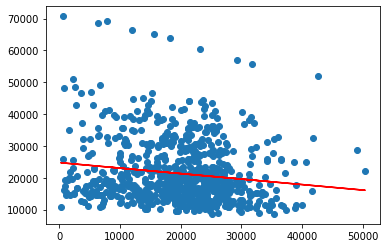



R2 Score:  0.02046344732348926


In [11]:
Y_vals= df.Price.values.reshape(-1,1)
X_vals= df.Mileage.values.reshape(-1,1)

model=LinearRegression()

reg_mod=model.fit(X=X_vals,y=Y_vals)
intercept=reg_mod.intercept_
coeff=reg_mod.coef_

plt.scatter(df['Mileage'],df['Price'])

line=df.Mileage.apply(lambda x: coeff*x + intercept)
plt.plot(df.Mileage,line, color='r')

plt.show()

print("\n\nR2 Score: ",model.score(X_vals,Y_vals))

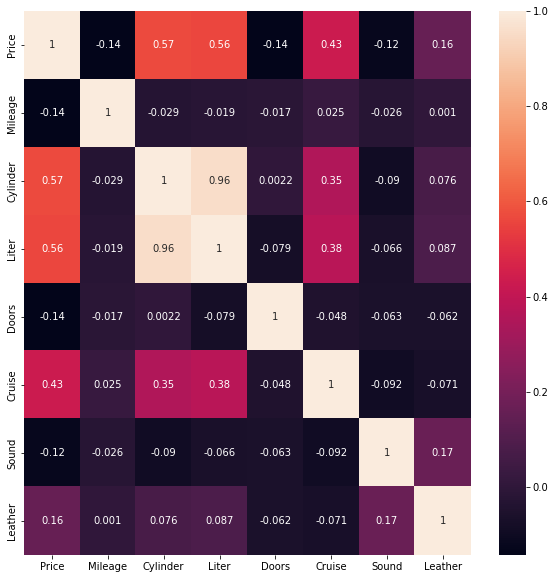

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [13]:
print("Doors: ",df['Doors'].value_counts())
print('\n')
print("Type: ",df['Type'].value_counts())
print('\n')
print("Cylinder: ",df['Cylinder'].value_counts())
print('\n')
print("Liter: ",df['Liter'].value_counts())
print('\n')
print("Trim: ",df['Trim'].value_counts())
print('\n')
print("Model: ",df['Model'].value_counts())
print('\n')
print("Make: ",df['Make'].value_counts())

Doors:  4    614
2    190
Name: Doors, dtype: int64


Type:  Sedan          490
Coupe          140
Wagon           64
Hatchback       60
Convertible     50
Name: Type, dtype: int64


Cylinder:  4    394
6    310
8    100
Name: Cylinder, dtype: int64


Liter:  2.2    190
3.8    160
3.5     80
4.6     60
1.6     60
2.0     60
2.3     50
3.6     30
1.8     30
5.7     20
6.0     20
3.1     10
2.8     10
3.4     10
3.0     10
2.5      4
Name: Liter, dtype: int64


Trim:  Sedan 4D               170
Coupe 2D                50
LS Sedan 4D             50
LT Sedan 4D             30
LS Coupe 2D             30
Quad Coupe 2D           20
SE Sedan 4D             20
Arc Sedan 4D            20
GT Sedan 4D             20
Aero Sedan 4D           20
Linear Wagon 4D         14
SLE Sedan 4D            10
GT Coupe 2D             10
GTP Sedan 4D            10
AWD Sportwagon 4D       10
Linear Conv 2D          10
GT Sportwagon           10
Sportwagon 4D           10
SS Coupe 2D             10
Linear Sedan 4D 

In [14]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
df['Mileage']=scaler.fit_transform(df['Mileage'].to_numpy().reshape(-1,1))

df.drop(columns=['Make','Model','Trim','Type','Cylinder','Price'],axis=1).head(3)

,Mileage,Liter,Doors,Cruise,Sound,Leather
0,-1.417485,3.1,4,1,1,1
1,-1.305902,3.1,4,1,1,0
2,-0.810128,3.1,4,1,1,0


In [15]:
X_vals=df.drop(columns=['Make','Model','Trim','Type','Cylinder','Price'],axis=1).values.reshape(-1,6)
Y_vals=df['Price'].values.reshape(-1,1)

reg_df=model.fit(X_vals,Y_vals)

print(model.score(X_vals,Y_vals))

0.42482840454267856


In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
Vif = [variance_inflation_factor(X_vals,i) for i in range(6)]
Vif

[1.002077000422754,
 8.486036716153984,
 7.2186780641481025,
 4.61836570843552,
 2.960378247278817,
 3.5842293393141818]

In [17]:
X_vals=df.drop(columns=['Make','Model','Trim','Type','Cylinder','Price','Liter'],axis=1).values.reshape(-1,5)

reg_df=model.fit(X_vals,Y_vals)

print(model.score(X_vals,Y_vals))

0.272825947675678


In [18]:
X_vals=df.drop(columns=['Make','Model','Trim','Type','Cylinder','Price','Doors'],axis=1).values.reshape(-1,5)

reg_df=model.fit(X_vals,Y_vals)

print(model.score(X_vals,Y_vals))

0.41650804904235117


It can be said that te best result is shown with all 6 features R2 score has the best result but still less than 0.8



In [19]:
make_dict=df['Make'].value_counts().to_dict()
make_dict['Cadillac']=100
df['Make']=df['Make'].map(make_dict)

In [20]:
X_vals=df.drop(columns=['Model','Trim','Type','Cylinder','Price'],axis=1).values.reshape(-1,7)

reg_df=model.fit(X_vals,Y_vals)

print(model.score(X_vals,Y_vals))

0.5279630053363991


In [21]:
type_dict=df['Type'].value_counts().to_dict()
type_dict['Wagon']=70
df['Type']=df['Type'].map(type_dict)

In [22]:
X_vals=df.drop(columns=['Model','Trim','Cylinder','Price'],axis=1).values.reshape(-1,8)

reg_df=model.fit(X_vals,Y_vals)

print(model.score(X_vals,Y_vals))

0.55509984718488


In [23]:
model_dict=df['Model'].value_counts().to_dict()
model_dict2={}
for i,j in model_dict.items():
  if j>30:
    model_dict2[i]=j

model_dict2['Cavalier']=70
model_dict2['Ion']=90
model_dict2['Malibu']=110

df['Model']=df['Model'].apply(lambda x: model_dict2.get(x,150))

In [24]:
X_vals=df.drop(columns=['Trim','Cylinder','Price'],axis=1).values.reshape(-1,9)

reg_df=model.fit(X_vals,Y_vals)

print(model.score(X_vals,Y_vals))

0.5670926678765178


This is the Maximum Score I was able to attain with Linear Regression (0.5670)